In [ ]:
pip install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=8a63395cc3bcb042ae56b4aa621aba90cdae48d0d429c5d8afcc869ef2fb9d22
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [ ]:
import wget

wget.download('https://github.com/aps1070-2019/datasets/raw/master/creditcard.tar.gz','creditcard.tar.gz')

'creditcard.tar.gz'

In [ ]:
!tar -zxvf creditcard.tar.gz

creditcard.csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
df = pd.read_csv('creditcard.csv')

In [ ]:
### YOUR CODE HERE ###
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.shape

(284807, 31)

It's important when looking at a new dataset to figure out how many examples we have for each class.

* What is the percentage of entries in the dataset for each class? 0.1727%(492) for class 1 and 99.827%(284315) for class 0 **[0.5]**
* Is this data considered balanced or unbalanced? Why is this the case?Unblanced because class 1 samples too small. Should be close to class 0 to be considered balanced **[0.5]**
* Why is balance/imbalance important? How might this class ditribution affect a KNN classifier for example, which we explored in Project 1? It is important because the model needs to see more fraud data to be able to learn and determine if a data is fraud. Right now the model will have a high accuracy because almost all data in this dataset is class 0. The model rarely learns anything from the data. In the case of KNN, the model will overfitting and it won't be accurate if new data is fed into the model **[0.5]**



In [ ]:
a = df.groupby('Class')['Class'].count()
print('outliers:{}%\nnormal data:{}%'.format(a[1]/(a[0]+a[1])*100,a[0]/(a[0]+a[1])*100))

outliers:0.1727485630620034%
normal data:99.82725143693798%


In [ ]:
a

Class
0    284315
1       492
Name: Class, dtype: int64

Next, split the dataset into a training (70%) and testing set (30%). Set the random state to 0.

Make sure to separate out the column corresponding to the targets.

As mentioned earlier, in this lab we are going to use Gaussian distributions to model the data. To accomplish this, we are going to introduce `scipy`, a package which contains a wide variety of tools for working with scientific data in Python. Its `stats` package allows us to easily model various statistical distributions, and get information about them.

Scipy's Gaussian distribution class is called `norm`. It takes two parameters - `loc`, which corresponds to the mean of your distribution, and `scale`, which corresponds to the standard deviation.

* What are the mean and standard deviation for variable V20? Make sure to only use your training set for this calculation. Mean: 0.00043 Std: 0.7702 **[0.5]**

Use the code below to set up a Gaussian object for V20.

In [ ]:
### Split the data  ###
X = df.drop(columns=['Class'])
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [ ]:
loc = X_train['V20'].mean(),  
scale = X_train['V20'].std()
print('V20 Mean:{}\nV20 Std:{}'.format(loc,scale))

V20 Mean:(0.0004302219382028674,)
V20 Std:0.7702574561360888


In [ ]:
from scipy import stats

norm = stats.norm(

    loc = X_train['V20'].mean(),  
    scale = X_train['V20'].std()

)

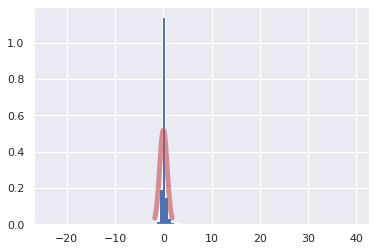

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.gridspec as gridspec

var_name = 'V20'

fig, ax = plt.subplots(1, 1)
x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)
ax.plot(x, norm.pdf(x),
       'r-', lw=5, alpha=0.6, label='norm pdf')
ax.hist(X_train[var_name].values, density=True, histtype='stepfilled', bins=100);
plt.show()


We can also look at the difference in distribution for some variables between fraudulent and non-fraudulent transactions:

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

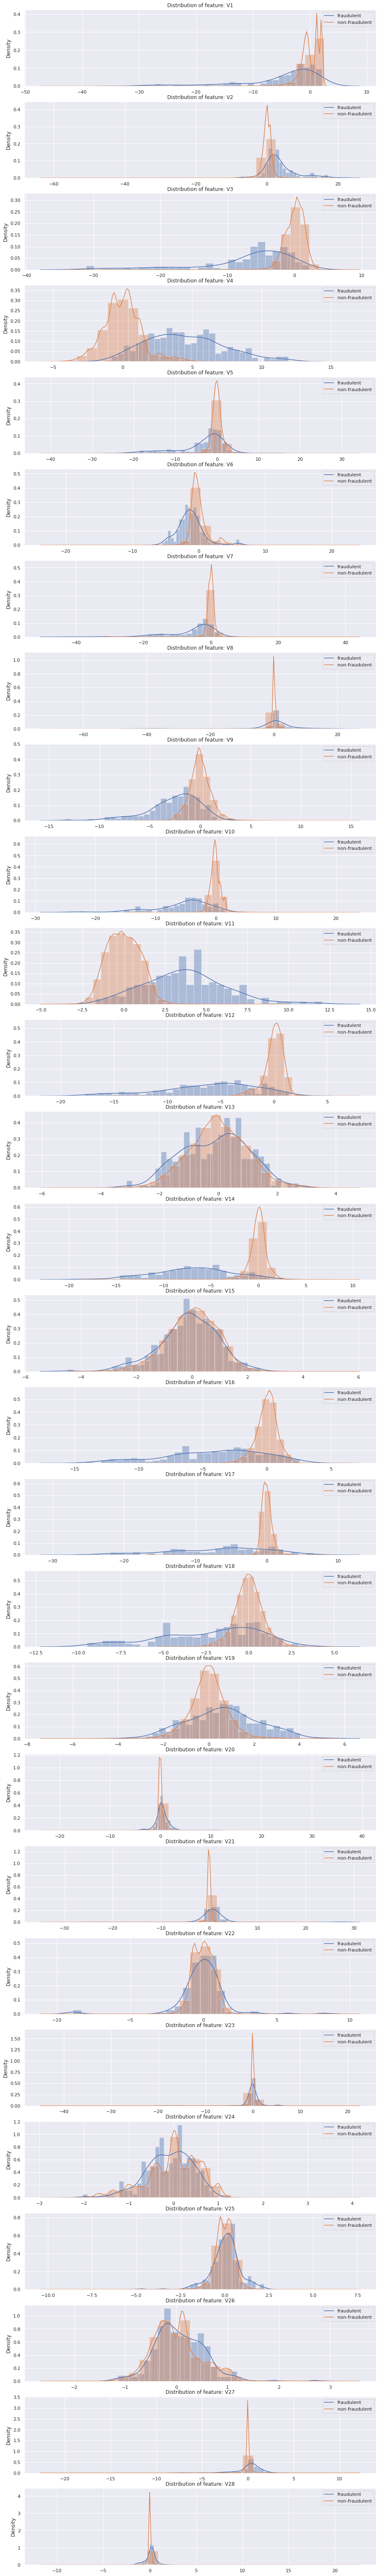

In [ ]:
features=[f for f in df.columns if 'V' in f]
nplots=np.size(features)
plt.figure(figsize=(15,4*nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(features):
    ax = plt.subplot(gs[i])
    sns.distplot(X_train[feat][y_train==1], bins=30)
    sns.distplot(X_train[feat][y_train==0], bins=30)
    ax.legend(['fraudulent', 'non-fraudulent'],loc='best')
    ax.set_xlabel('')
    ax.set_title('Distribution of feature: ' + feat)

Explain how these graphs could provide meaningful information about anomaly detection using a gaussian model. **[1]** For these features, not all features have a gaussian distribution. For these who do not have a gaussian distribution, the method may not be applicable by using these features.

## **Part 2: *Unsupervised,* One Gaussian** -- Single feature model with one Gaussian distribution: [3 Marks]
We'll start by making a prediction using **a single feature of our dataset at a time**. 

  * Fit a Gaussian distribution on a feature of **the full training dataset** (this is unsupervised learning, we don't use the labels) using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.5]**
  * Compute AUC (Area under the ROC Curve) based on ``sklearn.mixture.GaussianMixture.score_samples`` on the full training set (including both classes). **[0.5]**
  * Repeat the above steps for each of the features and present your findings in a table. **[0.5]**
  * Find the best feature to distinguish fraudulent transactions from non-fraudulent transactions based on AUC. **[0.5]** V14
  *  To make a prediction based on a model's scores: If the ``score_samples`` is lower than a threshold, we consider that transaction as a fraud. Find an optimal threshold that maximizes the F1 Score in the training set. It's worth noting that for this last step, we're now using class labels for the first time, and so this method could be considered semi-supervised. **[1]**



In [ ]:
### YOUR CODE HERE ###
from sklearn.mixture import GaussianMixture
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

gm = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, )
gm.fit(X_train)
p = gm.score_samples(X_train)
fpr_sc, tpr_sc, _ = roc_curve(y_train,1-p)
print ("AUC of Single Component" , format( auc(fpr_sc, tpr_sc) , ".3f"))

AUC of Single Component 0.952


In [ ]:
a=[]
b=[]
for i in range(30):
  gm = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, )
  gm.fit(X_train[[X_train.columns[i]]])
  p = gm.score_samples(X_train[[X_train.columns[i]]])
  fpr_sc, tpr_sc, _ = roc_curve(y_train,1-p)  
  a.append(X_train.columns[i])
  b.append(auc(fpr_sc, tpr_sc))
df_sc = pd.DataFrame(zip(a,b))

In [ ]:
df_sc.columns = ['Name','ROC']
df_sc.set_index('Name')
df_sc.T


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
Name,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
ROC,0.510726,0.705102,0.837499,0.876537,0.892103,0.771825,0.73438,0.862967,0.773238,0.802874,0.9136,0.897175,0.92018,0.572152,0.952459,0.514764,0.902137,0.934852,0.80803,0.741874,0.734692,0.833521,0.561287,0.696326,0.469229,0.574918,0.503272,0.835479,0.814201,0.627402


In [ ]:
df_sc.sort_values(by='ROC',ascending=False).head(3)    #V14 has the highest ROC, thus it is the best feature for fraud detection

,Name,ROC
14,V14,0.952459
17,V17,0.934852
12,V12,0.920180


In [ ]:
sorted(p)

In [ ]:
#Use V14 as it provides highest AUC
gm.fit(X_train[['V14']])
p = gm.score_samples(X_train[['V14']])
fpr_sc, tpr_sc, _ = roc_curve(y_train,1-p)
print ("AUC of Single Component" , format( auc(fpr_sc, tpr_sc) , ".3f"))


AUC of Single Component 0.952


In [ ]:
#Since p is sorted, The threshold will likely be in the first rows as they are the smallest. I will select the first 1000 values in p for evaluation
mn_gm = sorted(p)[1]
precision = precision_score(y_train, p < mn_gm) 
recall = recall_score(y_train, p < mn_gm)
F0 = (2 * precision * recall) / (precision + recall)
a=[]
b=[]
for i in range(1,1000):
  mn_gm = sorted(p)[i]
  precision = precision_score(y_train, p < mn_gm) 
  recall = recall_score(y_train, p < mn_gm)
  F1 = (2 * precision * recall) / (precision + recall) 
  if F1 > F0:
    F0 = F1
    a.append(i)
    b.append(F0)


In [ ]:
#Threshold is optimal when F1 is at maximum of 0.6146788990825689, Threshold is:-20.56591338149068 
print("Highest F1 value is:{} when Threshold is:{} ".format(b[-1],sorted(p)[a[-1]]))

Highest F1 value is:0.6146788990825689 when Threshold is:-20.56591338149068 


In [ ]:
#The last number in a is 309, which means that F1 is largest when the iteraltion is at 309, and from 309 to 1000, the F1 values are all smaller.
a

## **Part 3: *Supervised,* One Gaussian** -- Single feature model with one Gaussian distribution: [3 Marks]
This part is similar to Part 2, but here we only fit a Gaussian distribution to the non-fraudulent transactions (and not all training data).

  * Fit a Gaussian distribution on a feature of **non-fraudulent transactions** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.5]**
  * Compute AUC (Area under the ROC Curve) based on ``sklearn.mixture.GaussianMixture.score_samples`` on the full training set (including both classes). **[0.5]**
  * Repeat the above steps for each of the features and present your findings in a table. **[0.5]**
  * Find the best feature to distinguish fraudulent transactions from non-fraudulent transactions based on AUC. **[0.5]**
  *  Find an optimal threshold that maximizes the F1 Score in the training set. **[0.5]**
  *  Compare your results with Part 2 - does using a model based on the full dataset vs a model based only on non-fraudulent data make a big difference on performance? **[0.5]** By comparing the values of the AUC and F1, the difference is very little.


In [ ]:
### YOUR CODE HERE ###
df1 = df.loc[df['Class'] == 0]
X1 = df1.drop(columns=['Class'])
y1 = df1['Class']
X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y1, test_size=0.3, random_state=0)

In [ ]:
gm = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, )
gm.fit(X1_train)
p = gm.score_samples(X_train)
fpr_sc, tpr_sc, _ = roc_curve(y_train,1-p)
print ("AUC of Single Component" , format( auc(fpr_sc, tpr_sc) , ".3f"))

AUC of Single Component 0.958


In [ ]:
a=[]
b=[]
for i in range(30):
  gm = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, )
  gm.fit(X1_train[[X1_train.columns[i]]])
  p = gm.score_samples(X_train[[X_train.columns[i]]])
  fpr_sc, tpr_sc, _ = roc_curve(y_train,1-p)  
  a.append(X_train.columns[i])
  b.append(auc(fpr_sc, tpr_sc))
df_sc = pd.DataFrame(zip(a,b))

In [ ]:
#Best AUC of 0.952586 When only selecting V14
df_sc.columns = ['Name','ROC']
df_sc.set_index('Name')
df_sc.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
Name,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
ROC,0.510769,0.705245,0.837574,0.877341,0.892616,0.771871,0.734377,0.863204,0.773196,0.803421,0.913566,0.89757,0.920849,0.572119,0.952586,0.514824,0.902065,0.93444,0.807987,0.742074,0.735101,0.833854,0.561294,0.696526,0.469156,0.574907,0.503207,0.83555,0.814262,0.627814


In [ ]:
gm = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, )
gm.fit(X1_train[['V14']])
p = gm.score_samples(X_train[['V14']])
fpr_sc, tpr_sc, _ = roc_curve(y_train,1-p)


In [ ]:
mn_gm = sorted(p)[1]
precision = precision_score(y_train, p < mn_gm) 
recall = recall_score(y_train, p < mn_gm)
F0 = (2 * precision * recall) / (precision + recall)
a=[]
b=[]
for i in range(1,1000):
  mn_gm = sorted(p)[i]
  precision = precision_score(y_train, p < mn_gm) 
  recall = recall_score(y_train, p < mn_gm)
  F1 = (2 * precision * recall) / (precision + recall)
  if F1 > F0:
    F0 = F1
    a.append(i)
    b.append(F0)

In [ ]:
#Threshold is optimal when F1 is at maximum of 0.61515. Threshold is:-22.519642245103732 
print("Highest F1 value is:{} when Threshold is:{} ".format(b[-1],sorted(p)[a[-1]]))

Highest F1 value is:0.6151515151515151 when Threshold is:-22.519642245103732 


## **Part 4: *Supervised,* Two Gaussians** -- Single feature model with two Gaussian distributions. [3 Marks]
Now we will use two separate distributions for fraudulent and non-fraudulent transactions.
  *  Fit a Gaussian distribution ($G_1$) on a feature of non-fraudulent transactions using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. Use the feature that lead to the best AUC in Part 3. **[0.5]**
  * Fit another Gaussian distribution ($G_2$) on the same feature but for fraudulent transactions using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.5]**
  * Compute the score samples ($S$) for both $G_1$ and $G_2$ on the whole training set to get $S_1$ and $S_2$, respectively. **[0.5]**
  * Find an optimal $c$ (a real number) that maximizes F1 Score for a model such that if $S_1 < c \times S_2$, the transaction is classified as a fraud. For example, if $c=1$ we could say that if $S_2$ is greater than $S_1$ then the transaction is a fraud (the transaction belongs to the $G_2$ distribution which represents fraudulent transactions). **[0.5]**
  * Repeat the steps above for at least two other features. **[1]**

In [ ]:
X = df.drop(columns=['Class'])
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)
X0_train = X_train.loc[y_train == 0]
X1_train = X_train.loc[y_train == 1]
G1 = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, )
G2 = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, ) 
G1.fit(X0_train[['V14']])
G2.fit(X1_train[['V14']])
S1 = G1.score_samples(X_train[['V14']])
S2 = G2.score_samples(X_train[['V14']])
#fpr_sc, tpr_sc, _ = roc_curve(y_train,1-p0)
#print ("AUC of Single Component" , format( auc(fpr_sc, tpr_sc) , ".3f"))

In [ ]:
#Here, we discovered that C is 4
a=[]
b=[]
d=[]
F0 = 0.0
mn_gm = sorted(S2)[1]
for c in range(1,6): #Try c from 1 to 5
  for i in range(1,300):      #reduce number of iterations to save computation time since S2 is sorted
    mn_gm = sorted(S2)[i]
    precision = precision_score(y_train, S1 < c*mn_gm) 
    recall = recall_score(y_train, S1 < c*mn_gm)
    F1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    if F1 > F0:
      F0 = F1
      a.append(i)
      b.append(F0)
      d.append(c)

In [ ]:
print("Highest F1 value is:{} when Threshold is:{} and c is:{} ".format(b[-1],sorted(S2)[a[-1]],d[-1]))

Highest F1 value is:0.6151515151515151 when Threshold is:-5.701675459466315 and c is:4 


In [ ]:
#repeat step for V12 and V17 as they also have high AUC
#V12
G1.fit(X0_train[['V12']])
G2.fit(X1_train[['V12']])
S1 = G1.score_samples(X_train[['V12']])
S2 = G2.score_samples(X_train[['V12']])
a=[]
b=[]
d=[]
F0 = 0.0
mn_gm = sorted(S2)[1]
for c in range(2,6): #Try c from 2 to 5
  for i in range(1,200):      #reduce number of iterations to save computation time since S2 is sorted
    mn_gm = sorted(S2)[i]
    precision = precision_score(y_train, S1 < c*mn_gm) 
    recall = recall_score(y_train, S1 < c*mn_gm)
    F1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    if F1 > F0:
      F0 = F1
      a.append(i)
      b.append(F0)
      d.append(c)


In [ ]:
print("Highest F1 value is:{} when Threshold is:{} and c is:{} ".format(b[-1],sorted(S2)[a[-1]],d[-1]))

Highest F1 value is:0.6786296900489397 when Threshold is:-5.890540853052068 and c is:2 


In [ ]:
#V17 
G1.fit(X0_train[['V17']])
G2.fit(X1_train[['V17']])
S1 = G1.score_samples(X_train[['V17']])
S2 = G2.score_samples(X_train[['V17']])
a=[]
b=[]
d=[]
F0 = 0.0
mn_gm = sorted(S2)[1]
for c in range(2,6): #Try c from 2 to 5
  for i in range(1,200):      #reduce number of iterations to save computation time since S2 is sorted
    mn_gm = sorted(S2)[i]
    precision = precision_score(y_train, S1 < c*mn_gm) 
    recall = recall_score(y_train, S1 < c*mn_gm)
    F1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    if F1 > F0:
      F0 = F1
      a.append(i)
      b.append(F0)
      d.append(c)

In [ ]:
print("Highest F1 value is:{} when Threshold is:{} and c is:{} ".format(b[-1],sorted(S2)[a[-1]],d[-1]))

Highest F1 value is:0.5837988826815643 when Threshold is:-4.86973997687009 and c is:4 


## **Part 5: Multivariate and Mixture of Gaussians Distribution** [6 Marks]
We now want to build an outlier detection model that performs well in terms of F1 score. To design your model, you can benefit from:

*   No restrictions on the number of features - use as few or as many as you want! (multivariate). 
*   To fit your model, you can take advantage of the Gaussian mixture model where you can set the number of components [help](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) (take a look at the hint below).
*   You can choose to fit your Gaussians on non-fraudulent transactions or to both classes. **Make sure you have at least one model of each group**.
* You can use supervised and/or unsupervised methods. **Make sure you have at least one model of each group**.

It is up to you how to design your model. Try at least 12 different models and report the AUC and best F1 score for each one. What kind of model works better? How many features are best (and which ones)? How many Gaussians? How many components? Summarize your findings with tables and plots. **[6]**

**HINT!**

Does it make sense to have more than two Gaussians (or a mixture with more than 2 components) in this kind of (binary) task?

 The answer is YES, and it depends on the distribution of data. Remember the tutorial, where we had 5 clusters and fit a mixture of 5 Gaussians to detect outliers. Consider the transaction is valid if it is close to each one of those five clusters, and it is not valid if it is not close to them! For example (figure below), assume we have a high volume of legitimate transactions in the morning until lunchtime (9 AM to 12 PM). We have fewer transactions during lunchtime. Then we have another pick between (1 PM to 4 PM). In this example, it is reasonable to have two valid clusters (compenents), one for the morning and another for the afternoon transactions.
 ![Example:](https://raw.githubusercontent.com/aps1070-2019/datasets/master/img/AMoW2.png)


In [ ]:
F1_value = []
auc_value= []
num_gauss = []
num_comp = []
num_feature = []

In [ ]:
#unsupervised 2 feature: V12, V14
#1 gaussian, number of component=1
X = df.drop(columns=['Class'])
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

G1 = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, )
G1.fit(X_train[['V14','V12']])
S1 = G1.score_samples(X_train[['V14','V12']])
fpr_sc, tpr_sc, _ = roc_curve(y_train,1-S1)
print ("AUC :" , format( auc(fpr_sc, tpr_sc) , ".3f"))
auc_value.append(auc(fpr_sc, tpr_sc))
F0 = 0.0
a=[]
b=[]
for i in range(1,500):
  mn_gm = sorted(S1)[i]
  precision = precision_score(y_train, S1 < mn_gm) 
  recall = recall_score(y_train, S1 < mn_gm)
  F1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
  if F1 > F0:
    F0 = F1
    a.append(i)
    b.append(F0)
print("Best F1 value is:{} when Threshold is:{}".format(b[-1],sorted(S2)[a[-1]]))
F1_value.append(b[-1])

AUC : 0.961
Best F1 value is:0.6776859504132232 when Threshold is:-306.3703045086757


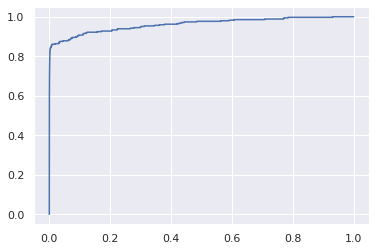

In [ ]:
fpr_sc, tpr_sc,_= roc_curve(y_train,1-S1)
plt.plot(fpr_sc,tpr_sc)
num_gauss.append(1)
num_comp.append(1)
num_feature.append(2)

In [ ]:
#unsupervised，2 feature: V12, V14
#1 gaussian, number of component=2
X = df.drop(columns=['Class'])
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

G1 = GaussianMixture(n_components = 2,
                    covariance_type = 'full', random_state=0, )
G1.fit(X_train[['V14','V12']])
S1 = G1.score_samples(X_train[['V14','V12']])
fpr_sc, tpr_sc, _ = roc_curve(y_train,1-S1)
print ("AUC :" , format( auc(fpr_sc, tpr_sc) , ".3f"))
auc_value.append(auc(fpr_sc, tpr_sc))
F0 = 0.0
a=[]
b=[]
for i in range(1,500):
  mn_gm = sorted(S1)[i]
  precision = precision_score(y_train, S1 < mn_gm) 
  recall = recall_score(y_train, S1 < mn_gm)
  F1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
  if F1 > F0:
    F0 = F1
    a.append(i)
    b.append(F0)
print("Best F1 value is:{} when Threshold is:{}".format(b[-1],sorted(S2)[a[-1]]))
F1_value.append(b[-1])

AUC : 0.965
Best F1 value is:0.6533996683250415 when Threshold is:-307.5597486849302


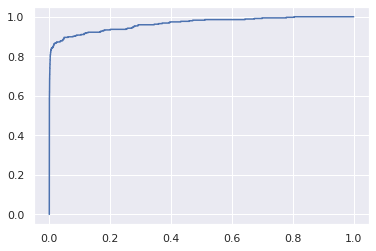

In [ ]:
fpr_sc, tpr_sc,_= roc_curve(y_train,1-S1)
plt.plot(fpr_sc,tpr_sc)
num_gauss.append(1)
num_comp.append(2)
num_feature.append(2)

In [ ]:
#unsupervised，2 feature: V12, V14
#1 gaussian, number of component=4
X = df.drop(columns=['Class'])
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

G1 = GaussianMixture(n_components = 4,
                    covariance_type = 'full', random_state=0, )
G1.fit(X_train[['V14','V12']])
S1 = G1.score_samples(X_train[['V14','V12']])
fpr_sc, tpr_sc, _ = roc_curve(y_train,1-S1)
print ("AUC :" , format( auc(fpr_sc, tpr_sc) , ".3f"))
auc_value.append(auc(fpr_sc, tpr_sc))
F0 = 0.0
a=[]
b=[]
for i in range(1,500):
  mn_gm = sorted(S1)[i]
  precision = precision_score(y_train, S1 < mn_gm) 
  recall = recall_score(y_train, S1 < mn_gm)
  F1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
  if F1 > F0:
    F0 = F1
    a.append(i)
    b.append(F0)
print("Best F1 value is:{} when Threshold is:{}".format(b[-1],sorted(S2)[a[-1]]))
F1_value.append(b[-1])

AUC : 0.966
Best F1 value is:0.5923566878980892 when Threshold is:-295.0687911744356


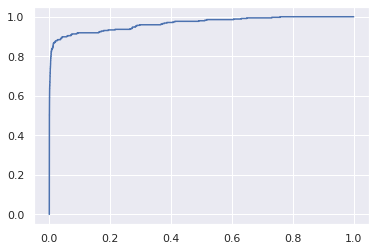

In [ ]:
fpr_sc, tpr_sc,_= roc_curve(y_train,1-S1)
plt.plot(fpr_sc,tpr_sc)
num_gauss.append(1)
num_comp.append(4)
num_feature.append(2)

In [ ]:
#unsupervised，3 feature: V12, V14, V17
#1 gaussian, number of component=1
X = df.drop(columns=['Class'])
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

G1 = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, )
G1.fit(X_train[['V14','V12','V17']])
S1 = G1.score_samples(X_train[['V14','V12','V17']])
fpr_sc, tpr_sc, _ = roc_curve(y_train,1-S1)
print ("AUC :" , format( auc(fpr_sc, tpr_sc) , ".3f"))
auc_value.append(auc(fpr_sc, tpr_sc))
F0 = 0.0
a=[]
b=[]
for i in range(1,500):
  mn_gm = sorted(S1)[i]
  precision = precision_score(y_train, S1 < mn_gm) 
  recall = recall_score(y_train, S1 < mn_gm)
  F1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
  if F1 > F0:
    F0 = F1
    a.append(i)
    b.append(F0)
print("Best F1 value is:{} when Threshold is:{}".format(b[-1],sorted(S2)[a[-1]]))
F1_value.append(b[-1])

AUC : 0.961
Best F1 value is:0.7058823529411765 when Threshold is:-256.316126584498


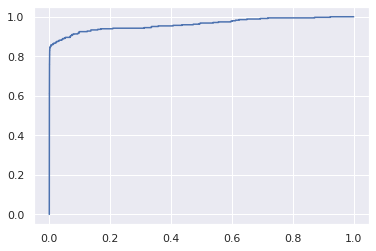

In [ ]:
fpr_sc, tpr_sc,_= roc_curve(y_train,1-S1)
plt.plot(fpr_sc,tpr_sc)
num_gauss.append(1)
num_comp.append(1)
num_feature.append(3)

In [ ]:
#unsupervised，3 feature: V12, V14, V17
#1 gaussian, number of component=2
X = df.drop(columns=['Class'])
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

G1 = GaussianMixture(n_components = 2,
                    covariance_type = 'full', random_state=0, )
G1.fit(X_train[['V14','V12','V17']])
S1 = G1.score_samples(X_train[['V14','V12','V17']])
fpr_sc, tpr_sc, _ = roc_curve(y_train,1-S1)
print ("AUC :" , format( auc(fpr_sc, tpr_sc) , ".3f"))
auc_value.append(auc(fpr_sc, tpr_sc))
F0 = 0.0
a=[]
b=[]
for i in range(1,500):
  mn_gm = sorted(S1)[i]
  precision = precision_score(y_train, S1 < mn_gm) 
  recall = recall_score(y_train, S1 < mn_gm)
  F1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
  if F1 > F0:
    F0 = F1
    a.append(i)
    b.append(F0)
print("Best F1 value is:{} when Threshold is:{}".format(b[-1],sorted(S2)[a[-1]]))
F1_value.append(b[-1])

AUC : 0.965
Best F1 value is:0.6743185078909613 when Threshold is:-261.30448002477675


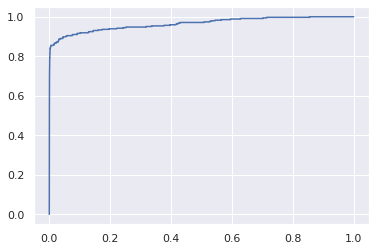

In [ ]:
fpr_sc, tpr_sc,_= roc_curve(y_train,1-S1)
plt.plot(fpr_sc,tpr_sc)
num_gauss.append(1)
num_comp.append(2)
num_feature.append(3)

In [ ]:
#unsupervised，3 feature: V12, V14, V17
#1 gaussian, number of component=4
X = df.drop(columns=['Class'])
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

G1 = GaussianMixture(n_components = 4,
                    covariance_type = 'full', random_state=0, )
G1.fit(X_train[['V14','V12','V17']])
S1 = G1.score_samples(X_train[['V14','V12','V17']])
fpr_sc, tpr_sc, _ = roc_curve(y_train,1-S1)
print ("AUC :" , format( auc(fpr_sc, tpr_sc) , ".3f"))
auc_value.append(auc(fpr_sc, tpr_sc))
F0 = 0.0
a=[]
b=[]
for i in range(1,500):
  mn_gm = sorted(S1)[i]
  precision = precision_score(y_train, S1 < mn_gm) 
  recall = recall_score(y_train, S1 < mn_gm)
  F1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
  if F1 > F0:
    F0 = F1
    a.append(i)
    b.append(F0)
print("Best F1 value is:{} when Threshold is:{}".format(b[-1],sorted(S2)[a[-1]]))
F1_value.append(b[-1])

AUC : 0.964
Best F1 value is:0.5159235668789809 when Threshold is:-295.0687911744356


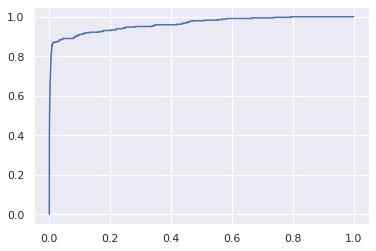

In [ ]:
fpr_sc, tpr_sc,_= roc_curve(y_train,1-S1)
plt.plot(fpr_sc,tpr_sc)
num_gauss.append(1)
num_comp.append(4)
num_feature.append(3)

In [ ]:
#unsupervised，All features except time and amount: V1 - V28
#1 gaussian, number of component=1
X = df.drop(columns=['Class','Time','Amount'])
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

G1 = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, )
G1.fit(X_train)
S1 = G1.score_samples(X_train)
fpr_sc, tpr_sc, _ = roc_curve(y_train,1-S1)
print ("AUC :" , format( auc(fpr_sc, tpr_sc) , ".3f"))
auc_value.append(auc(fpr_sc, tpr_sc))
F0 = 0.0
a=[]
b=[]
for i in range(1,500):
  mn_gm = sorted(S1)[i]
  precision = precision_score(y_train, S1 < mn_gm) 
  recall = recall_score(y_train, S1 < mn_gm)
  F1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
  if F1 > F0:
    F0 = F1
    a.append(i)
    b.append(F0)
print("Best F1 value is:{} when Threshold is:{}".format(b[-1],sorted(S2)[a[-1]]))
F1_value.append(b[-1])

AUC : 0.953
Best F1 value is:0.294010889292196 when Threshold is:-336.87755833991724


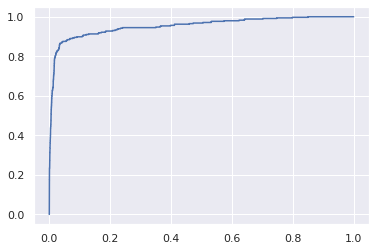

In [ ]:
fpr_sc, tpr_sc,_= roc_curve(y_train,1-S1)
plt.plot(fpr_sc,tpr_sc)
num_gauss.append(1)
num_comp.append(1)
num_feature.append(28)

In [ ]:
#unsupervised，All features except time and amount: V1 - V28
#1 gaussian, number of component=2
X = df.drop(columns=['Class','Time','Amount'])
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

G1 = GaussianMixture(n_components = 2,
                    covariance_type = 'full', random_state=0, )
G1.fit(X_train)
S1 = G1.score_samples(X_train)
fpr_sc, tpr_sc, _ = roc_curve(y_train,1-S1)
print ("AUC :" , format( auc(fpr_sc, tpr_sc) , ".3f"))
auc_value.append(auc(fpr_sc, tpr_sc))
F0 = 0.0
a=[]
b=[]
for i in range(1,500):
  mn_gm = sorted(S1)[i]
  precision = precision_score(y_train, S1 < mn_gm) 
  recall = recall_score(y_train, S1 < mn_gm)
  F1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
  if F1 > F0:
    F0 = F1
    a.append(i)
    b.append(F0)
print("Best F1 value is:{} when Threshold is:{}".format(b[-1],sorted(S2)[a[-1]]))
F1_value.append(b[-1])

AUC : 0.931
Best F1 value is:0.28222996515679444 when Threshold is:-316.7889217666931


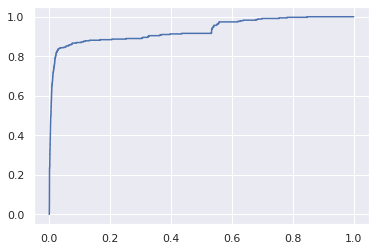

In [ ]:
fpr_sc, tpr_sc,_= roc_curve(y_train,1-S1)
plt.plot(fpr_sc,tpr_sc)
num_gauss.append(1)
num_comp.append(2)
num_feature.append(28)

In [ ]:
#unsupervised，All features except time and amount: V1 - V28
#1 gaussian, number of component=4
X = df.drop(columns=['Class','Time','Amount'])
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

G1 = GaussianMixture(n_components = 4,
                    covariance_type = 'full', random_state=0, )
G1.fit(X_train)
S1 = G1.score_samples(X_train)
fpr_sc, tpr_sc, _ = roc_curve(y_train,1-S1)
print ("AUC :" , format( auc(fpr_sc, tpr_sc) , ".3f"))
auc_value.append(auc(fpr_sc, tpr_sc))
F0 = 0.0
a=[]
b=[]
for i in range(1,500):
  mn_gm = sorted(S1)[i]
  precision = precision_score(y_train, S1 < mn_gm) 
  recall = recall_score(y_train, S1 < mn_gm)
  F1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
  if F1 > F0:
    F0 = F1
    a.append(i)
    b.append(F0)
print("Best F1 value is:{} when Threshold is:{}".format(b[-1],sorted(S2)[a[-1]]))
F1_value.append(b[-1])

AUC : 0.930
Best F1 value is:0.2903225806451613 when Threshold is:-250.23895693541928


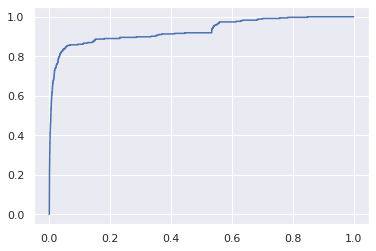

In [ ]:
fpr_sc, tpr_sc,_= roc_curve(y_train,1-S1)
plt.plot(fpr_sc,tpr_sc)
num_gauss.append(1)
num_comp.append(4)
num_feature.append(28)

In [ ]:
#supervised，all features
#2 gaussian, number of component=2
X = df.drop(columns=['Class','Time','Amount'])
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)
X0_train = X_train.loc[y_train == 0]
X1_train = X_train.loc[y_train == 1]
G1 = GaussianMixture(n_components = 2,
                    covariance_type = 'full', random_state=0, )
G2 = GaussianMixture(n_components = 2,
                    covariance_type = 'full', random_state=0, ) 
G1.fit(X0_train)
G2.fit(X1_train)
S1 = G1.score_samples(X_train)
S2 = G2.score_samples(X_train)
fpr_sc, tpr_sc, _ = roc_curve(y_train,1-S1)
print ("AUC :" , format( auc(fpr_sc, tpr_sc) , ".3f"))

F0 = 0.0
a=[]
b=[]
for i in range(1,500):
  mn_gm = sorted(S1)[i]
  precision = precision_score(y_train, S1 < mn_gm) 
  recall = recall_score(y_train, S1 < mn_gm)
  F1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
  if F1 > F0:
    F0 = F1
    a.append(i)
    b.append(F0)
print("Best F1 value is:{} when Threshold is:{}".format(b[-1],sorted(S2)[a[-1]]))
F1_value.append(b[-1])
auc_value.append(auc(fpr_sc, tpr_sc))

AUC : 0.941
Best F1 value is:0.5247376311844077 when Threshold is:-436.2190367984969


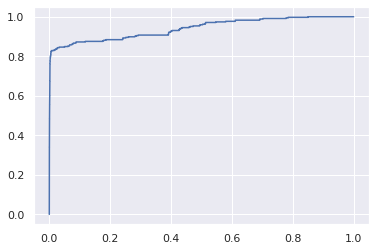

In [ ]:
fpr_sc, tpr_sc,_= roc_curve(y_train,1-S1)
plt.plot(fpr_sc,tpr_sc)
num_gauss.append(2)
num_comp.append(2)
num_feature.append(3)

In [ ]:
#supervised，all features
#2 gaussian, number of component=1
X = df.drop(columns=['Class','Time','Amount'])
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)
X0_train = X_train.loc[y_train == 0]
X1_train = X_train.loc[y_train == 1]
G1 = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, )
G2 = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, ) 
G1.fit(X0_train)
G2.fit(X1_train)
S1 = G1.score_samples(X_train)
S2 = G2.score_samples(X_train)
fpr_sc, tpr_sc, _ = roc_curve(y_train,1-S1)
print ("AUC :" , format( auc(fpr_sc, tpr_sc) , ".3f"))

F0 = 0.0
a=[]
b=[]
for i in range(1,500):
  mn_gm = sorted(S1)[i]
  precision = precision_score(y_train, S1 < mn_gm) 
  recall = recall_score(y_train, S1 < mn_gm)
  F1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
  if F1 > F0:
    F0 = F1
    a.append(i)
    b.append(F0)
print("Best F1 value is:{} when Threshold is:{}".format(b[-1],sorted(S2)[a[-1]]))
F1_value.append(b[-1])
auc_value.append(auc(fpr_sc, tpr_sc))

AUC : 0.958
Best F1 value is:0.533724340175953 when Threshold is:-265.1004118141153


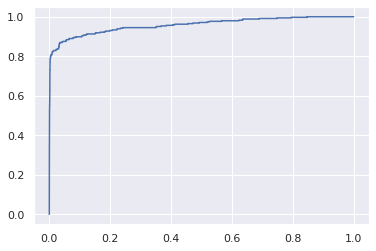

In [ ]:
fpr_sc, tpr_sc,_= roc_curve(y_train,1-S1)
plt.plot(fpr_sc,tpr_sc)
num_gauss.append(2)
num_comp.append(1)
num_feature.append(3)

In [ ]:
#supervised，all features
#2 gaussian, number of component=4
X = df.drop(columns=['Class','Time','Amount'])
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)
X0_train = X_train.loc[y_train == 0]
X1_train = X_train.loc[y_train == 1]
G1 = GaussianMixture(n_components = 4,
                    covariance_type = 'full', random_state=0, )
G2 = GaussianMixture(n_components = 4,
                    covariance_type = 'full', random_state=0, ) 
G1.fit(X0_train)
G2.fit(X1_train)
S1 = G1.score_samples(X_train)
S2 = G2.score_samples(X_train)
fpr_sc, tpr_sc, _ = roc_curve(y_train,1-S1)
print ("AUC :" , format( auc(fpr_sc, tpr_sc) , ".3f"))

F0 = 0.0
a=[]
b=[]
for i in range(1,500):
  mn_gm = sorted(S1)[i]
  precision = precision_score(y_train, S1 < mn_gm) 
  recall = recall_score(y_train, S1 < mn_gm)
  F1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
  if F1 > F0:
    F0 = F1
    a.append(i)
    b.append(F0)
print("Best F1 value is:{} when Threshold is:{}".format(b[-1],sorted(S2)[a[-1]]))
F1_value.append(b[-1])
auc_value.append(auc(fpr_sc, tpr_sc))

AUC : 0.929
Best F1 value is:0.5408450704225352 when Threshold is:-665.4107639155085


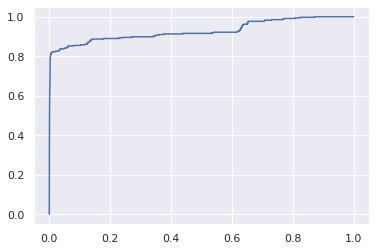

In [ ]:
fpr_sc, tpr_sc,_= roc_curve(y_train,1-S1)
plt.plot(fpr_sc,tpr_sc)
num_gauss.append(2)
num_comp.append(4)
num_feature.append(3)

In [ ]:

summary = pd.DataFrame(zip(num_gauss,num_comp,num_feature,F1_value,auc_value))


In [ ]:
summary.columns = ['Num_Gaussians','Num_Component','Num_features','F1 Score','AUC_Val']
summary

,Num_Gaussians,Num_Component,Num_features,F1 Score,AUC_Val
0,1,1,2,0.677686,0.961210
1,1,2,2,0.653400,0.965098
2,1,4,2,0.592357,0.965759
3,1,1,3,0.705882,0.961480
4,1,2,3,0.674319,0.964623
5,1,4,3,0.515924,0.963529
6,1,1,28,0.294011,0.953477
7,1,2,28,0.282230,0.931139
8,1,4,28,0.290323,0.930183
9,2,2,3,0.524738,0.940856


## **Part 6: Evaluating performance on test set:** [1 Mark]
**Which model worked better?** Pick your best model among all models and apply it to your test set. Report the F1 Score, precision and recall on the test set. **[1]** 1 gaussian, 1 component and 3 features has the best result. F1=0.70588n AUC=0.96148 on training.

Test set: AUC = 0.951, F1 = 0.7176, precision is:0.7012987012987013, recall is:0.7346938775510204



In [ ]:
### YOUR CODE HERE ###
#unsupervised，3 feature: V12, V14, V17
#1 gaussian, number of component=1
X = df.drop(columns=['Class'])
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

G1 = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, )
G1.fit(X_test[['V14','V12','V17']])
S1 = G1.score_samples(X_test[['V14','V12','V17']])
fpr_sc, tpr_sc, _ = roc_curve(y_test,1-S1)
print ("AUC :" , format( auc(fpr_sc, tpr_sc) , ".3f"))
F0 = 0.0
a=[]
b=[]
pre=[]
rec=[]
for i in range(1,500):
  mn_gm = sorted(S1)[i]
  precision = precision_score(y_test, S1 < mn_gm) 
  recall = recall_score(y_test, S1 < mn_gm)
  F1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
  if F1 > F0:
    F0 = F1
    a.append(i)
    b.append(F0)
    pre.append(precision)
    rec.append(recall)
print("Best F1 value is:{} when Threshold is:{} precision is:{}, recall is:{}".format(b[-1],sorted(S2)[a[-1]],pre[-1],rec[-1]))


AUC : 0.951
Best F1 value is:0.717607973421927 when Threshold is:-917.6985090019186 precision is:0.7012987012987013, recall is:0.7346938775510204
